In [56]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM
from keras.models import Sequential
init_notebook_mode(connected=True)

In [36]:
start_date = date.today() - timedelta(days=5000)
start_date = start_date.strftime("%Y-%m-%d")
end_date = date.today().strftime("%Y-%m-%d")

In [37]:
df = yf.download("TRY=X", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [39]:
df["Date"] = df.index

In [40]:
df = df.reset_index(drop=True)

In [31]:
fig = go.Figure(data=[go.Candlestick(
    x=df["Date"],
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
)])

fig.show()

In [42]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date'], dtype='object')

In [43]:
df = df.drop(["Adj Close", "Date"], axis=1)

In [46]:
X = df.drop(["Close"], axis=1)
X = np.array(X)

y = df["Close"]
y = np.array(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [48]:
X_train.shape

(2852, 4)

In [49]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(4, 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, batch_size=1, epochs=25)

Epoch 1/25


2023-05-25 18:02:43.928577: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2852/2852 [==============================] - 5s 1ms/step - loss: 0.6392
Epoch 2/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.2280
Epoch 3/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0909
Epoch 4/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0765
Epoch 5/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0603
Epoch 6/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0481
Epoch 7/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0614
Epoch 8/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0369
Epoch 9/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0437
Epoch 10/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0372
Epoch 11/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0343
Epoch 12/25
2852/2852 [==============================] - 4s 1ms/step - loss: 0.0222
Epoch 13/25


In [52]:
model.save("SPPmodel.h5")

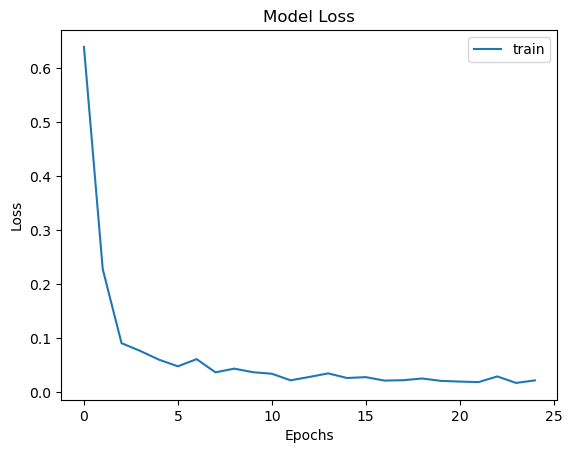

In [57]:
plt.figure()
plt.plot(history.history["loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train"])
plt.show()